# Unsupervised Machine Learning Project

In this Project, we are going to build an unsupervised machine learning model on a "Wholesale Customers" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. Below is a brief overview of data from the UCI repository -

[Kaggle Link For Data](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

Following are the fields - 

1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
2)	MILK: annual spending (m.u.) on milk products (Continuous);
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
7)	CHANNEL: Customer Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
8)	REGION: Customer Region - Lisnon, Oporto or Other (Nominal)




### Import Packages


In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Import the dataset and explore the shape and sample records

In [2]:
df = pd.read_csv('Data\Wholesale customers data.csv')
print(df.shape)
df.head(5)


(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Look at the summary Stats of various columns, check for missing values and outliers

In [3]:
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

### Observations on summary stats 
We can see in the data that there are 3 regions and 2 channels. Ideally when we are doing any sort of EDA we should be cognizant of the fact that the distribution of data points is unique to a group and hence any analysis if done should be done through that lens. Hence in the subsequent cells we will be creating a grouping column of region and channel, and study the differences across groups for a holistic understanding of the data. 

### Create a derived field of channel and region

In [4]:
# Convert 'Channel' and 'Region' to categorical columns
df['Channel'] = df['Channel'].astype('category')
df['Region'] = df['Region'].astype('category')

# Create a new column representing the combination of 'Region' and 'Channel'
df['Region_Channel'] = 'Region_' + df['Region'].astype(str) + ' Channel_' + df['Channel'].astype(str)

### Look for missing values in each group

In [5]:

grouped_missing_values = df.groupby('Region_Channel')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].apply(lambda x: x.isnull().sum())
print(grouped_missing_values)

                    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Region_Channel                                                                
Region_1 Channel_1      0     0        0       0                 0           0
Region_1 Channel_2      0     0        0       0                 0           0
Region_2 Channel_1      0     0        0       0                 0           0
Region_2 Channel_2      0     0        0       0                 0           0
Region_3 Channel_1      0     0        0       0                 0           0
Region_3 Channel_2      0     0        0       0                 0           0


### No missing values found

### Next Steps - Check for summary stats, outliers and distribution of the 6 products using box plots

Summary Stats for Fresh:
                    count          mean           std    min      25%     50%  \
Region_Channel                                                                  
Region_1 Channel_1   59.0  12902.254237  12342.008901  514.0  4437.50  8656.0   
Region_1 Channel_2   18.0   5200.000000   5415.521495   18.0  2378.25  2926.0   
Region_2 Channel_1   28.0  11650.535714   8969.362752    3.0  4938.25  9787.0   
Region_2 Channel_2   19.0   7289.789474   6867.934548  161.0  2368.00  6468.0   
Region_3 Channel_1  211.0  13878.052133  14746.572913    3.0  3702.50  9612.0   
Region_3 Channel_2  105.0   9831.504762   9635.394129   23.0  2343.00  7362.0   

                        75%       max  
Region_Channel                         
Region_1 Channel_1  18135.0   56083.0  
Region_1 Channel_2   5988.0   20782.0  
Region_2 Channel_1  17031.5   32717.0  
Region_2 Channel_2   9162.0   27082.0  
Region_3 Channel_1  18821.0  112151.0  
Region_3 Channel_2  15076.0   44466.0  




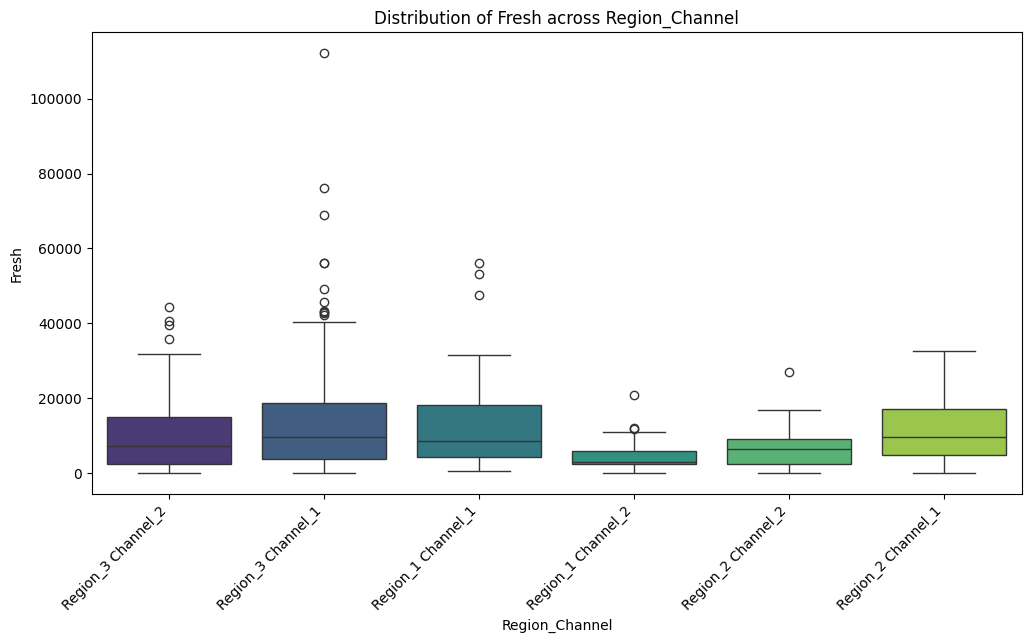

Summary Stats for Milk:
                    count          mean           std     min      25%  \
Region_Channel                                                           
Region_1 Channel_1   59.0   3870.203390   4298.321195   258.0  1071.00   
Region_1 Channel_2   18.0  10784.000000   6609.221463  2527.0  6253.25   
Region_2 Channel_1   28.0   2304.250000   2968.628697   333.0  1146.00   
Region_2 Channel_2   19.0   9190.789474   6611.354136   928.0  4148.50   
Region_3 Channel_1  211.0   3486.981043   4508.505269    55.0  1188.50   
Region_3 Channel_2  105.0  10981.009524  10574.827178  1124.0  6128.00   

                       50%       75%      max  
Region_Channel                                 
Region_1 Channel_1  2280.0   4995.50  23527.0  
Region_1 Channel_2  8866.0  13112.25  28326.0  
Region_2 Channel_1  1560.5   2344.75  16784.0  
Region_2 Channel_2  6817.0  13127.50  25071.0  
Region_3 Channel_1  2247.0   4205.00  43950.0  
Region_3 Channel_2  7845.0  11114.00  73498.0  

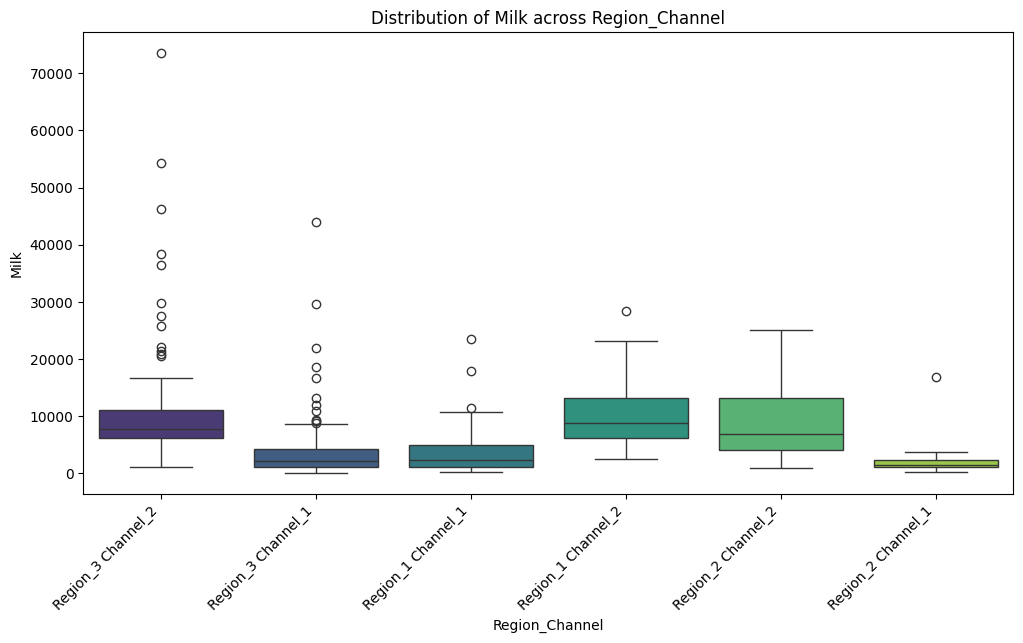

Summary Stats for Grocery:
                    count          mean           std     min       25%  \
Region_Channel                                                            
Region_1 Channel_1   59.0   4026.135593   3629.644143   489.0   1620.00   
Region_1 Channel_2   18.0  18471.944444  10414.687844  5265.0  10634.25   
Region_2 Channel_1   28.0   4395.500000   3048.298815  1330.0   2373.75   
Region_2 Channel_2   19.0  16326.315789  14035.453775  2743.0   9318.50   
Region_3 Channel_1  211.0   3886.734597   3593.506056     3.0   1666.00   
Region_3 Channel_2  105.0  15953.809524  12298.935356  4523.0   9170.00   

                        50%       75%      max  
Region_Channel                                  
Region_1 Channel_1   2576.0   5172.50  16966.0  
Region_1 Channel_2  16106.0  23478.75  39694.0  
Region_2 Channel_1   3352.0   5527.50  13626.0  
Region_2 Channel_2  12469.0  19785.50  67298.0  
Region_3 Channel_1   2642.0   4927.50  21042.0  
Region_3 Channel_2  12121.0  

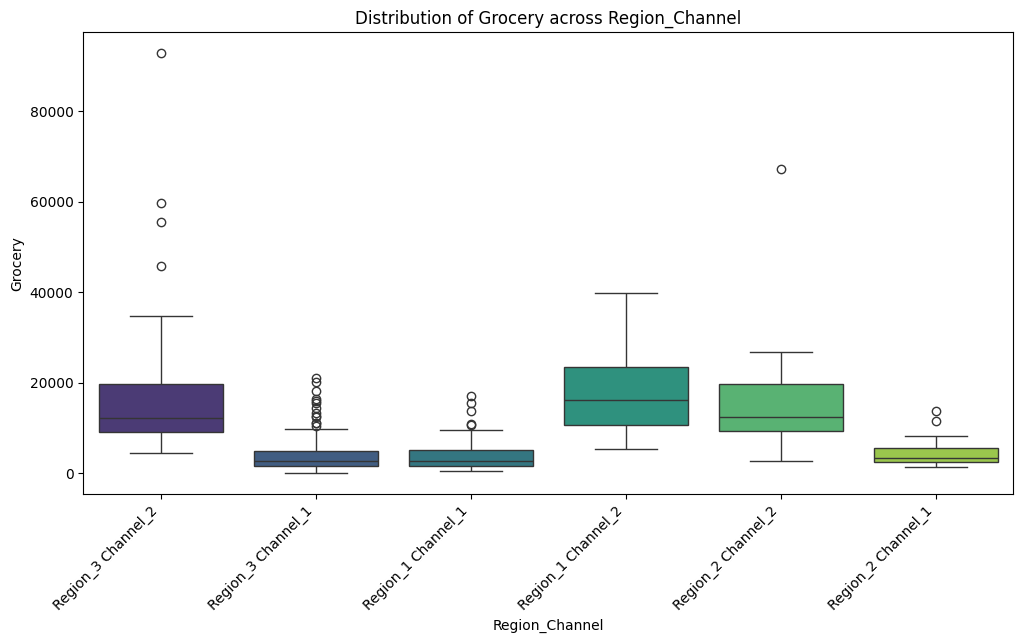

Summary Stats for Frozen:
                    count         mean           std    min     25%     50%  \
Region_Channel                                                                
Region_1 Channel_1   59.0  3127.322034   3276.460124   91.0  966.00  1859.0   
Region_1 Channel_2   18.0  2584.111111   2424.774577   61.0  923.50  1522.0   
Region_2 Channel_1   28.0  5745.035714  11454.478518  264.0  962.25  2696.5   
Region_2 Channel_2   19.0  1540.578947   2473.266471  131.0  639.50   934.0   
Region_3 Channel_1  211.0  3656.900474   4956.590848   25.0  779.00  1960.0   
Region_3 Channel_2  105.0  1513.200000   1504.498737   33.0  437.00  1059.0   

                       75%      max  
Region_Channel                       
Region_1 Channel_1  4479.0  18711.0  
Region_1 Channel_2  3843.0   8321.0  
Region_2 Channel_1  4617.0  60869.0  
Region_2 Channel_2  1410.0  11559.0  
Region_3 Channel_1  4542.5  36534.0  
Region_3 Channel_2  2194.0   8132.0  




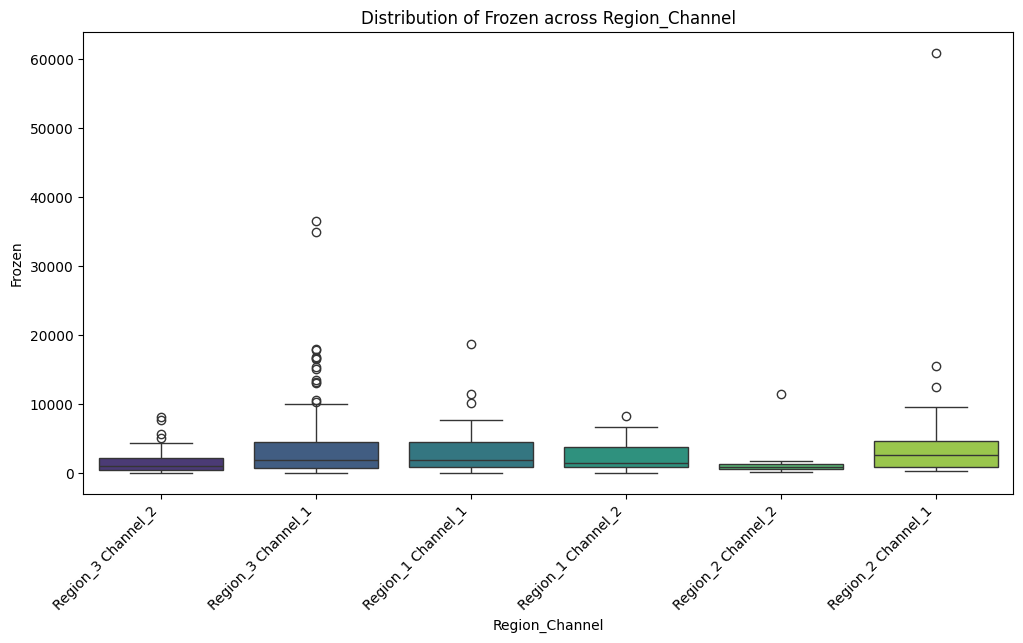

Summary Stats for Detergents_Paper:
                    count         mean          std    min      25%     50%  \
Region_Channel                                                                
Region_1 Channel_1   59.0   950.525424  1305.907616    5.0   237.00   412.0   
Region_1 Channel_2   18.0  8225.277778  5515.878798  788.0  4818.25  6177.0   
Region_2 Channel_1   28.0   482.714286   425.310506   15.0   182.75   325.0   
Region_2 Channel_2   19.0  8410.263158  8286.748255  332.0  3900.00  6236.0   
Region_3 Channel_1  211.0   786.682464  1099.970640    3.0   176.50   375.0   
Region_3 Channel_2  105.0  6899.238095  6022.091110  523.0  3537.00  5121.0   

                         75%      max  
Region_Channel                         
Region_1 Channel_1    874.00   5828.0  
Region_1 Channel_2  11804.75  19410.0  
Region_2 Channel_1    707.00   1679.0  
Region_2 Channel_2   9837.50  38102.0  
Region_3 Channel_1    948.50   6907.0  
Region_3 Channel_2   7677.00  40827.0  




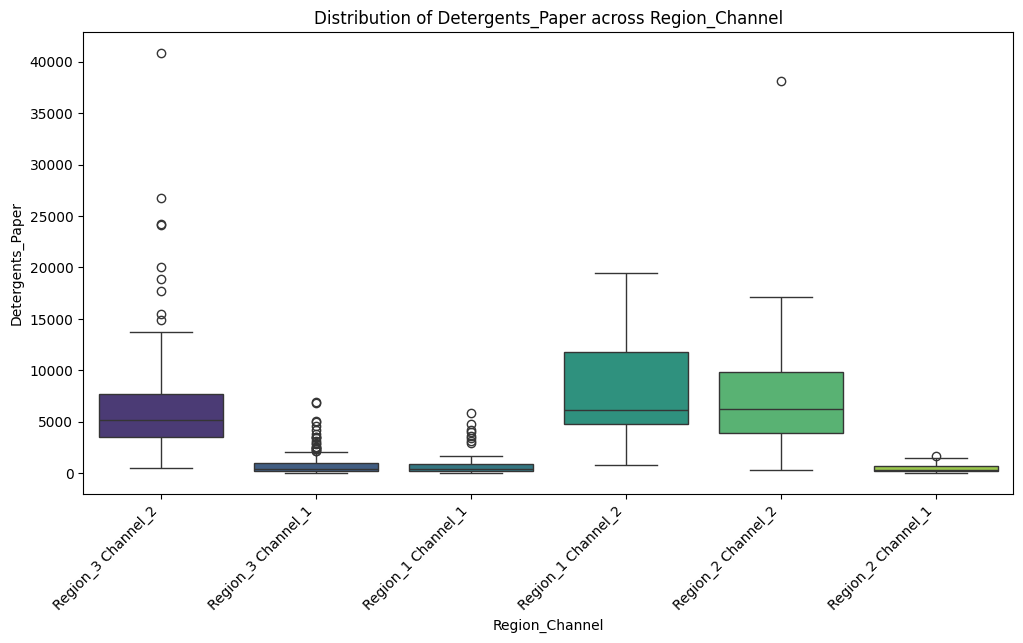

Summary Stats for Delicassen:
                    count         mean          std    min     25%     50%  \
Region_Channel                                                               
Region_1 Channel_1   59.0  1197.152542  1219.945304    7.0  374.00   749.0   
Region_1 Channel_2   18.0  1871.944444  1626.486667  120.0  746.00  1414.0   
Region_2 Channel_1   28.0  1105.892857  1056.778800   51.0  567.25   883.0   
Region_2 Channel_2   19.0  1239.000000  1065.438042   59.0  392.50  1037.0   
Region_3 Channel_1  211.0  1518.284360  3663.183304    3.0  378.50   823.0   
Region_3 Channel_2  105.0  1826.209524  2119.052222    3.0  545.00  1386.0   

                       75%      max  
Region_Channel                       
Region_1 Channel_1  1621.5   6854.0  
Region_1 Channel_2  2456.5   6372.0  
Region_2 Channel_1  1146.0   5609.0  
Region_2 Channel_2  1815.0   3508.0  
Region_3 Channel_1  1582.0  47943.0  
Region_3 Channel_2  2158.0  16523.0  




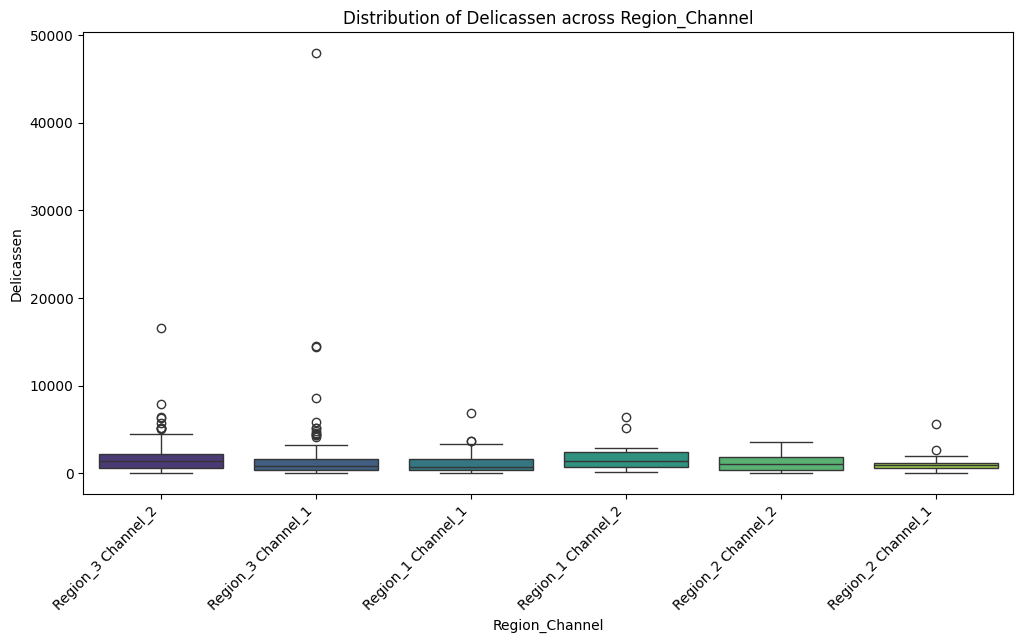

In [6]:
product_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
grouped_summary_stats = df.groupby('Region_Channel')[product_columns].describe()
for column in product_columns:
    
    print(f"Summary Stats for {column}:")
    print(grouped_summary_stats[column][['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])
    print("\n" + "="*50 + "\n")

    # Box plot for distribution comparison
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Region_Channel', y=column, data=df, hue='Region_Channel', palette='viridis')
    plt.title(f'Distribution of {column} across Region_Channel')
    plt.xlabel('Region_Channel')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.show()
    

### Key Findings -

Channel seems to largely dictating the variance in distribution across groups for following products - Fresh, Milk, Grocery, and Detergent Paper

For Frozen and Delicassen we do not observe a lot of variance across groups. 

### Next Steps - We see there are lot of outliers, so we will be treating them next as Kmeans performs badly with outliers. 

In [7]:
product_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

df_copy = df.copy()

product_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for column in product_columns:
    
    # Compute 25th percentile, 75th percentile, and IQR
    df[f'{column}_25%'] = df.groupby('Region_Channel')[column].transform(lambda x: x.quantile(0.25))
    df[f'{column}_75%'] = df.groupby('Region_Channel')[column].transform(lambda x: x.quantile(0.75))
    df[f'{column}_IQR'] = df[f'{column}_75%'] - df[f'{column}_25%']

    # Create outlier flags above and below the IQR range
    df[f'{column}_Outlier'] = (
        (df[column] > df[f'{column}_75%'] + 1.5 * df[f'{column}_IQR']) |
        (df[column] < df[f'{column}_25%'] - 1.5 * df[f'{column}_IQR'])
    ).astype(int)

    # Drop intermediate columns
    df.drop([f'{column}_25%', f'{column}_75%', f'{column}_IQR'], axis=1, inplace=True)


# Calculate the percentage of outliers in each group for each product column
outlier_percentages = df.groupby('Region_Channel')[[f'{column}_Outlier' for column in product_columns]].mean() * 100

# Display the percentage of outliers
print("Percentage of outliers in each group for each product column:")
print(outlier_percentages)



Percentage of outliers in each group for each product column:
                    Fresh_Outlier  Milk_Outlier  Grocery_Outlier  \
Region_Channel                                                     
Region_1 Channel_1       5.084746      5.084746         8.474576   
Region_1 Channel_2      16.666667      5.555556         0.000000   
Region_2 Channel_1       0.000000      3.571429         7.142857   
Region_2 Channel_2       5.263158      0.000000         5.263158   
Region_3 Channel_1       5.213270      5.213270         6.161137   
Region_3 Channel_2       3.809524     11.428571         3.809524   

                    Frozen_Outlier  Detergents_Paper_Outlier  \
Region_Channel                                                 
Region_1 Channel_1        5.084746                 13.559322   
Region_1 Channel_2        5.555556                  0.000000   
Region_2 Channel_1       10.714286                  3.571429   
Region_2 Channel_2        5.263158                  5.263158   
Region_3 

### We have lot of outliers in the dataset, we will have to impute these by capping the 5% and 95% threshold.

In [8]:
df = df_copy
product_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


for column in product_columns:

    # Compute 25th percentile, 75th percentile, 5th percentile, 95th percentile, and IQR
    df[f'{column}_25%'] = df.groupby('Region_Channel')[column].transform(lambda x: x.quantile(0.25))
    df[f'{column}_75%'] = df.groupby('Region_Channel')[column].transform(lambda x: x.quantile(0.75))
    df[f'{column}_5%'] = df.groupby('Region_Channel')[column].transform(lambda x: x.quantile(0.05))
    df[f'{column}_95%'] = df.groupby('Region_Channel')[column].transform(lambda x: x.quantile(0.95))
    df[f'{column}_IQR'] = df[f'{column}_75%'] - df[f'{column}_25%']

    # Create lower and upper bound columns
    df[f'{column}_Lower_Bound'] = df[f'{column}_25%'] - 1.5 * df[f'{column}_IQR']
    df[f'{column}_Upper_Bound'] = df[f'{column}_75%'] + 1.5 * df[f'{column}_IQR']

    # Create outlier flags above and below the IQR range
    df[f'{column}_Outlier'] = (
        (df[column] > df[f'{column}_75%'] + 1.5 * df[f'{column}_IQR']) |
        (df[column] < df[f'{column}_25%'] - 1.5 * df[f'{column}_IQR'])
    ).astype(int)


    # Cap values for rows where column_outlier is 1
    df[column] = np.where(
        (df[f'{column}_Outlier'] == 1) & (df[column] < df[f'{column}_Lower_Bound']),
        df[f'{column}_Lower_Bound'],
        df[column]
    )
    df[column] = np.where(
        (df[f'{column}_Outlier'] == 1) & (df[column] > df[f'{column}_Upper_Bound']),
        df[f'{column}_Upper_Bound'],
        df[column]
    )

    # Drop intermediate columns
    df.drop([f'{column}_25%', f'{column}_75%', f'{column}_5%', f'{column}_95%', f'{column}_IQR',
             f'{column}_Lower_Bound', f'{column}_Upper_Bound', 
             f'{column}_Outlier'], axis=1, inplace=True)
   


# Display the DataFrame with imputed values
print(df.head(5))

  Channel Region    Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
0       2      3  12669.0  9656.0   7561.0   214.0            2674.0   
1       2      3   7057.0  9810.0   9568.0  1762.0            3293.0   
2       2      3   6353.0  8808.0   7684.0  2405.0            3516.0   
3       1      3  13265.0  1196.0   4221.0  6404.0             507.0   
4       2      3  22615.0  5410.0   7198.0  3915.0            1777.0   

   Delicassen      Region_Channel  
0      1338.0  Region_3 Channel_2  
1      1776.0  Region_3 Channel_2  
2      4577.5  Region_3 Channel_2  
3      1788.0  Region_3 Channel_1  
4      4577.5  Region_3 Channel_2  


In [9]:
# Now check the outlier proportion 

product_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for column in product_columns:
    
    # Compute 25th percentile, 75th percentile, and IQR
    df[f'{column}_25%'] = df.groupby('Region_Channel')[column].transform(lambda x: x.quantile(0.25))
    df[f'{column}_75%'] = df.groupby('Region_Channel')[column].transform(lambda x: x.quantile(0.75))
    df[f'{column}_IQR'] = df[f'{column}_75%'] - df[f'{column}_25%']

    # Create outlier flags above and below the IQR range
    df[f'{column}_Outlier'] = (
        (df[column] > df[f'{column}_75%'] + 1.5 * df[f'{column}_IQR']) |
        (df[column] < df[f'{column}_25%'] - 1.5 * df[f'{column}_IQR'])
    ).astype(int)

    # Drop intermediate columns
    df.drop([f'{column}_25%', f'{column}_75%', f'{column}_IQR'], axis=1, inplace=True)


# Calculate the percentage of outliers in each group for each product column
outlier_percentages = df.groupby('Region_Channel')[[f'{column}_Outlier' for column in product_columns]].mean() * 100
print(outlier_percentages)

                    Fresh_Outlier  Milk_Outlier  Grocery_Outlier  \
Region_Channel                                                     
Region_1 Channel_1            0.0           0.0              0.0   
Region_1 Channel_2            0.0           0.0              0.0   
Region_2 Channel_1            0.0           0.0              0.0   
Region_2 Channel_2            0.0           0.0              0.0   
Region_3 Channel_1            0.0           0.0              0.0   
Region_3 Channel_2            0.0           0.0              0.0   

                    Frozen_Outlier  Detergents_Paper_Outlier  \
Region_Channel                                                 
Region_1 Channel_1             0.0                       0.0   
Region_1 Channel_2             0.0                       0.0   
Region_2 Channel_1             0.0                       0.0   
Region_2 Channel_2             0.0                       0.0   
Region_3 Channel_1             0.0                       0.0   
Region_

### All the outliers have been treated

### Next Steps - We will check for correlations across products within each group. But this analysis will be done at a channel level as most of the variance is at channel.  

In [10]:
# Drop redundant columns

# Iterate through each column
product_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Iterate through each column
for column in product_columns:
    

    # Drop intermediate columns
    df.drop([f'{column}_Outlier'], axis=1, inplace=True)

df.drop(columns=['Region_Channel'], inplace= True)
print(df.head(5))

  Channel Region    Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
0       2      3  12669.0  9656.0   7561.0   214.0            2674.0   
1       2      3   7057.0  9810.0   9568.0  1762.0            3293.0   
2       2      3   6353.0  8808.0   7684.0  2405.0            3516.0   
3       1      3  13265.0  1196.0   4221.0  6404.0             507.0   
4       2      3  22615.0  5410.0   7198.0  3915.0            1777.0   

   Delicassen  
0      1338.0  
1      1776.0  
2      4577.5  
3      1788.0  
4      4577.5  


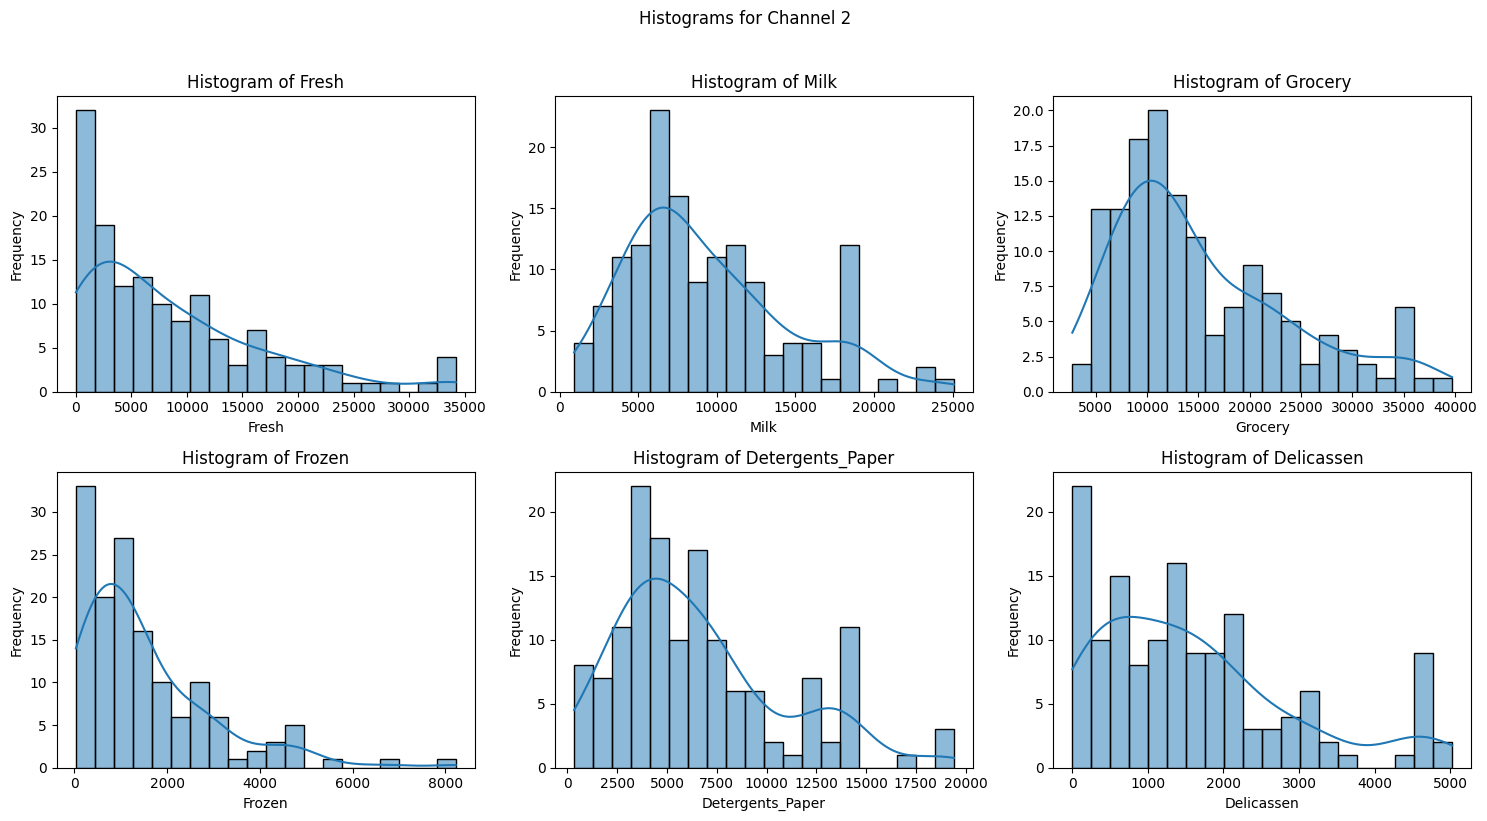

<Figure size 1200x1000 with 0 Axes>

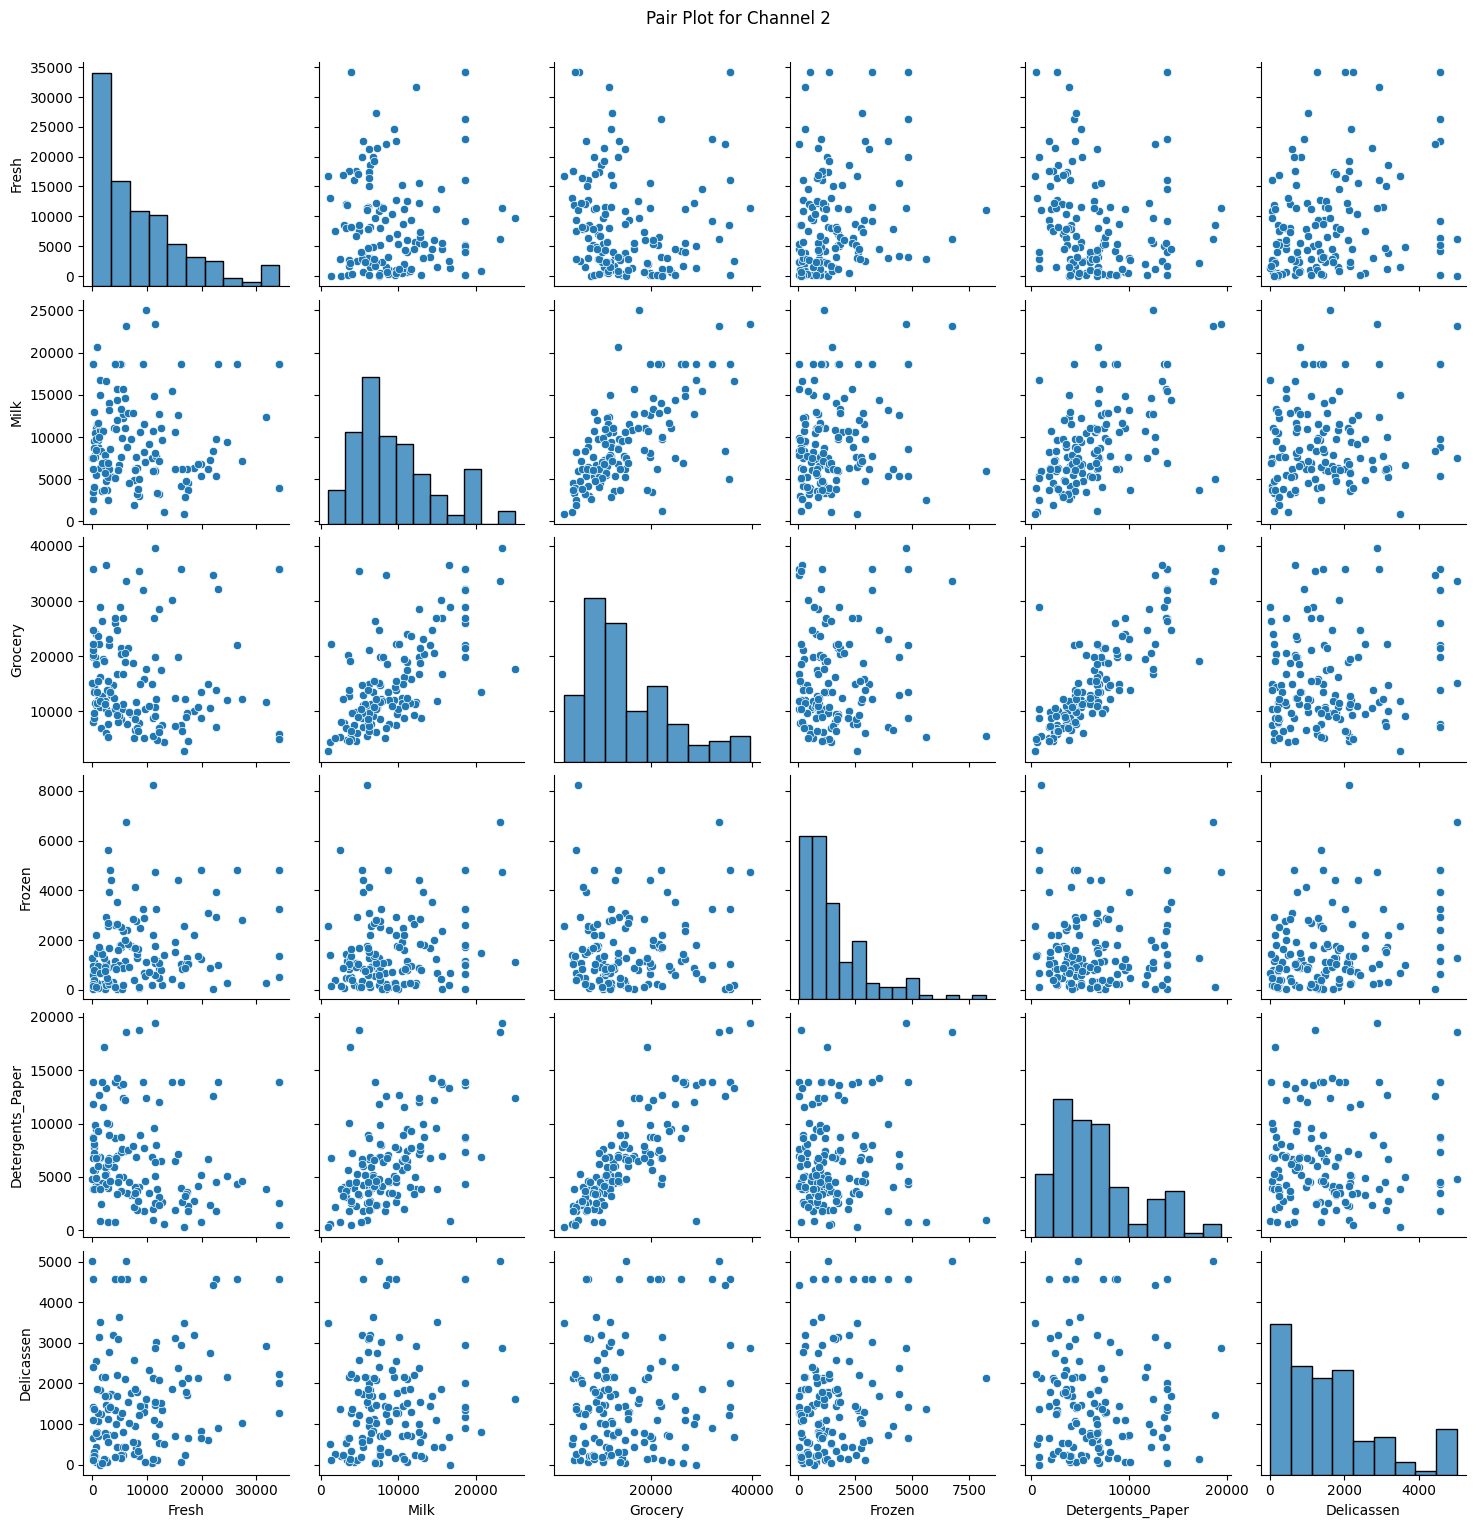

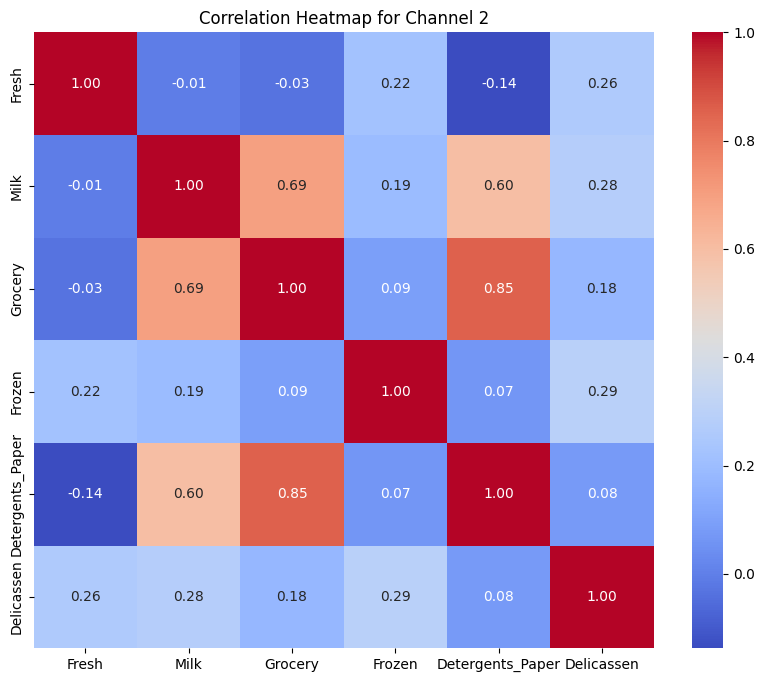

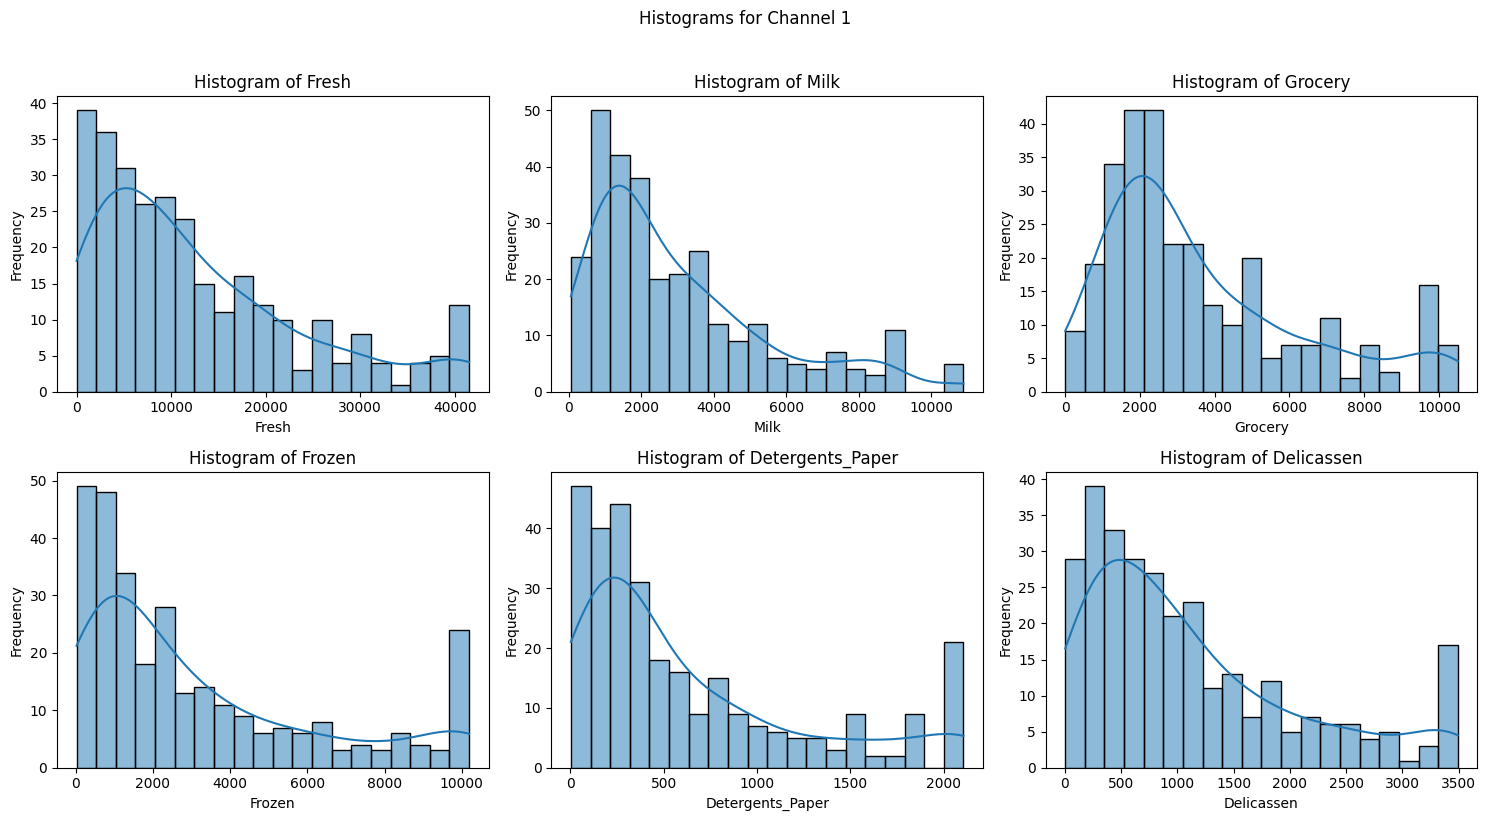

<Figure size 1200x1000 with 0 Axes>

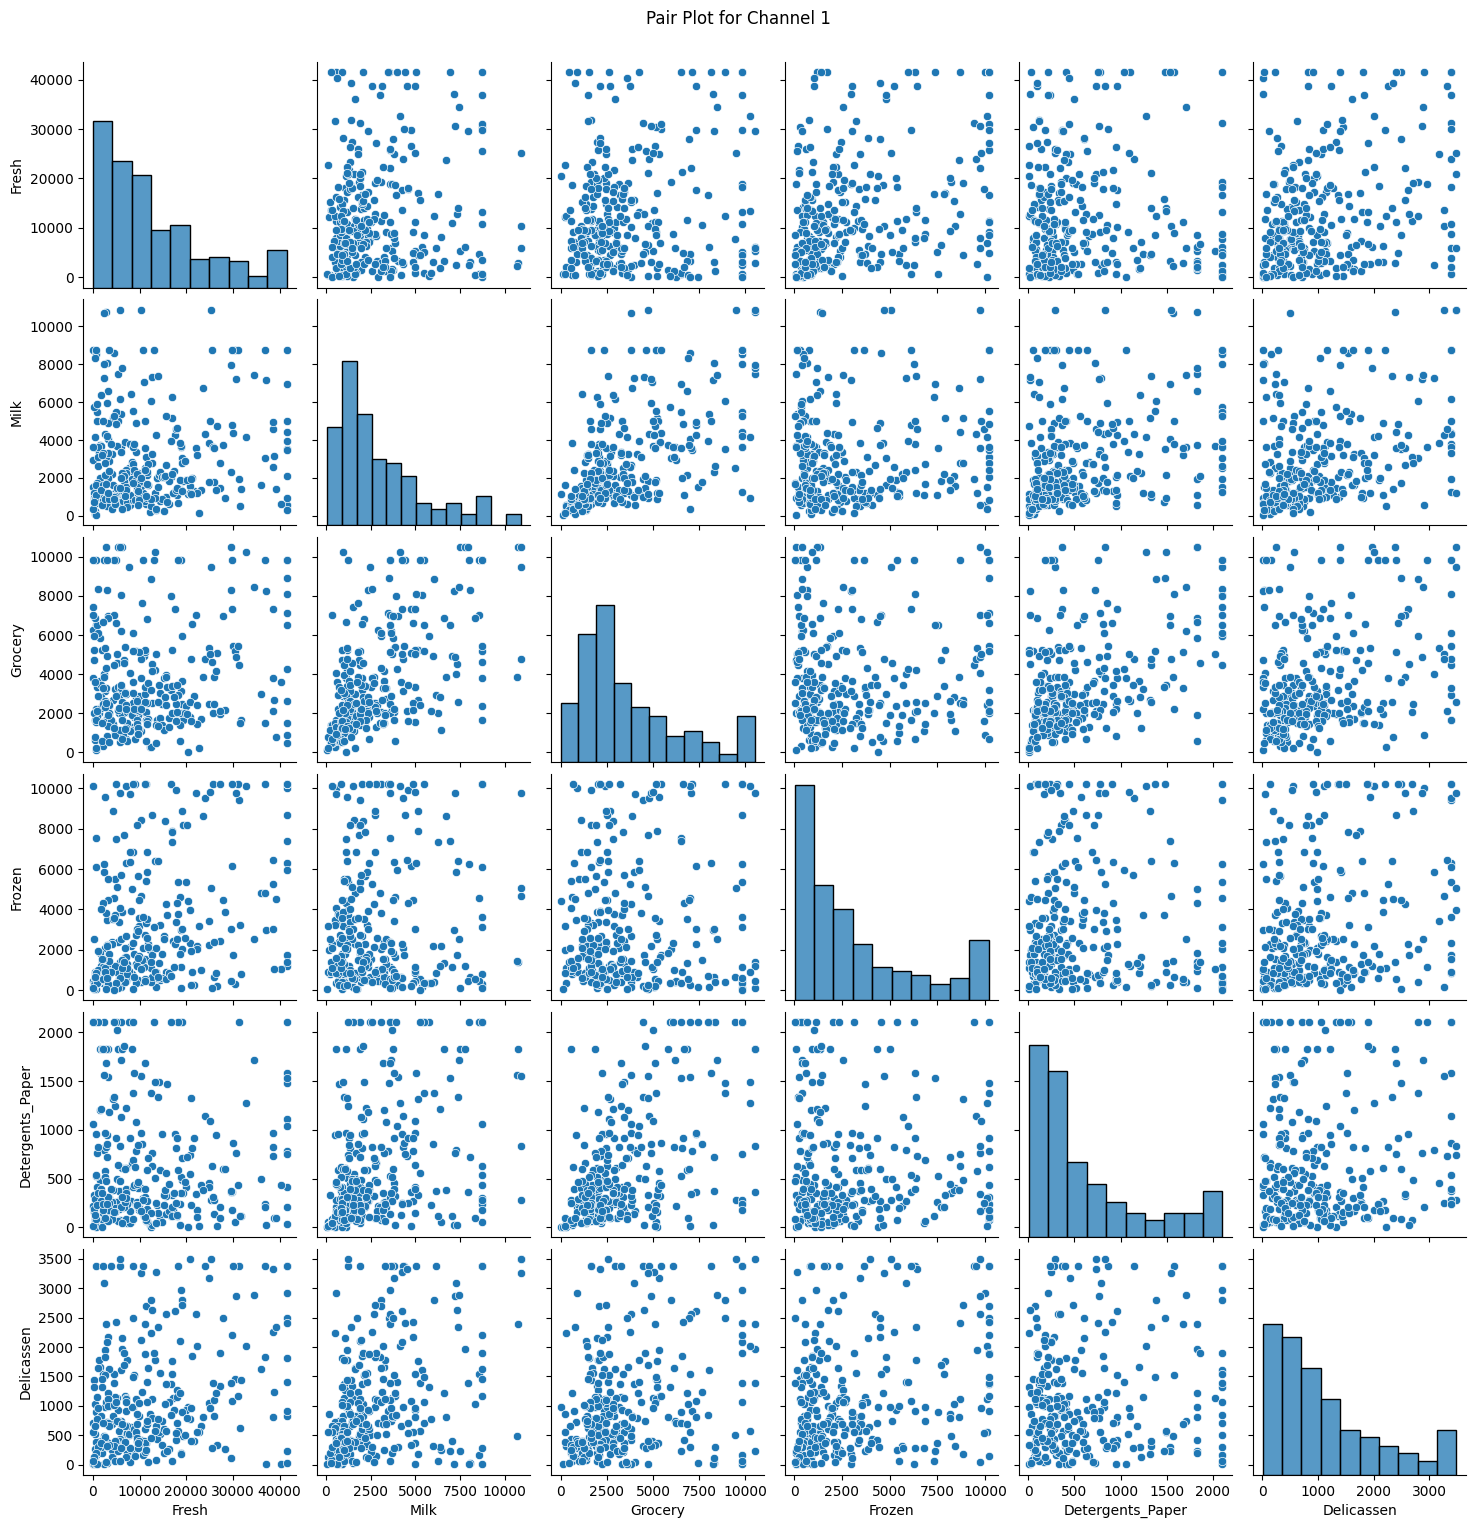

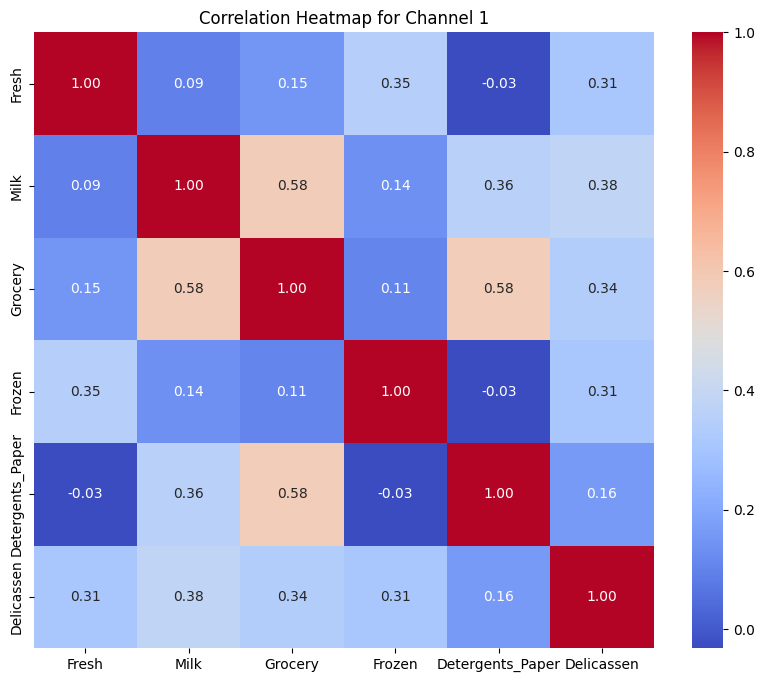

In [11]:

for channel in df['Channel'].unique():
    channel_data = df[df['Channel'] == channel]
    
    # Plot histograms for each product in a single frame
    plt.figure(figsize=(15, 8))
    for i, product in enumerate(df.columns[2:], start=1):
        plt.subplot(2, 3, i)
        sns.histplot(channel_data[product], bins=20, kde=True)
        plt.title(f'Histogram of {product}')
        plt.xlabel(product)
        plt.ylabel('Frequency')
    plt.suptitle(f'Histograms for Channel {channel}', y=1.02)
    plt.tight_layout()
    plt.show()

    # Plot pairplot across products
    plt.figure(figsize=(12, 10))
    sns.pairplot(channel_data.iloc[:, 2:])
    plt.suptitle(f'Pair Plot for Channel {channel}', y=1.02)
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(channel_data.iloc[:, 2:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for Channel {channel}')
    plt.show()

### Key Findings -

For channel 2 

-> All the products distribution is right skewed, but the tail size have reduced owing to outlier capping

-> Strong correlation between following - 

1. Grocery and Detergents_Paper
2. Milk and Detergents_Paper
3. Milk and Grocery


For channel 1

-> All the products distribution is right skewed, but the tail size have reduced owing to outlier capping

-> Strong correlation between following - 

1. Grocery and Detergents_Paper
2. Milk and Grocery


### Next Steps -  
1. One Hot encoding of region and channel
2. Scale the data 
3. Using PCA subset top 4 or 5 columns (Decide using scree plot)
4. Kmeans clustering
5. Heirarchical Clustering


(440, 9)
     Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Channel_2  \
0  12669.0  9656.0   7561.0   214.0            2674.0      1338.0       True   
1   7057.0  9810.0   9568.0  1762.0            3293.0      1776.0       True   
2   6353.0  8808.0   7684.0  2405.0            3516.0      4577.5       True   
3  13265.0  1196.0   4221.0  6404.0             507.0      1788.0      False   
4  22615.0  5410.0   7198.0  3915.0            1777.0      4577.5       True   

   Region_2  Region_3  
0     False      True  
1     False      True  
2     False      True  
3     False      True  
4     False      True  
(440, 9)
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.121429  1.002771  0.016617 -0.880896          0.032870    0.069685   
1 -0.417224  1.036268  0.280804 -0.317515          0.200518    0.472359   
2 -0.484796  0.818318  0.032808 -0.083502          0.260915    3.047909   
3  0.178634 -0.837405 -0.423036  1.371897         -0.5540

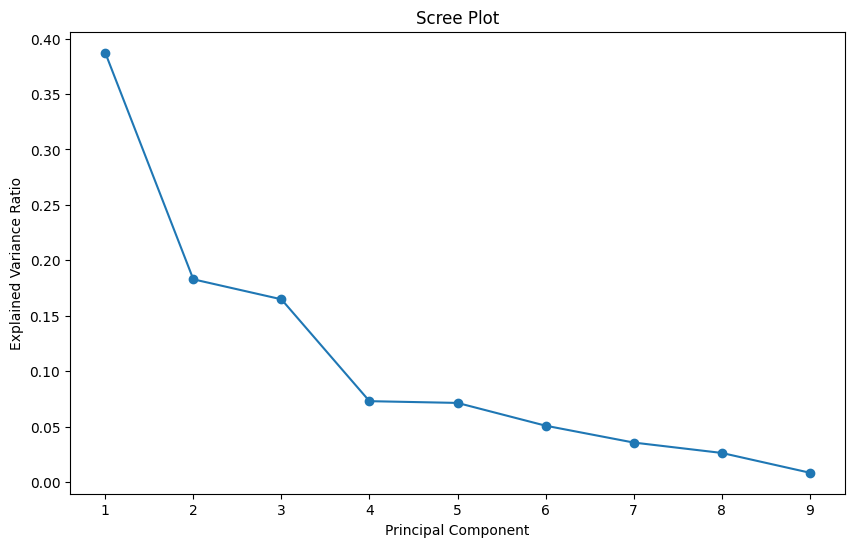

In [12]:
# Step 1: One-hot encode (drop_first=True) for Channel and Region
df_encoded = pd.get_dummies(df, columns=['Channel', 'Region'], drop_first=True)
print(df_encoded.shape)

# Step 2: Convert boolean columns to integers
boolean_columns = []
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)
print(df_encoded.head(5))

# Step 3: Scale all columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
print(df_scaled.shape)
print(df_scaled.head(5))

# Step 4: Scree plot for PCA component count
pca = PCA()
pca.fit(df_scaled)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_scaled.columns) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()





### We can see that 1 component gives 40% of cumulative variance, hence we will use this along with the other columns in the scaled dataframe. Plus to reduce the dimensionality we will drop the highly correlated columns (Milk and Detergant Paper) as there variance can be captured with Grocery. 

In [13]:
# Consider 1 component

pca = PCA(n_components=1)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA components
columns = [f'PCA{i}' for i in range(1, 2)]
df_pca = pd.DataFrame(df_pca, columns=columns)

# Display the transformed DataFrame
print(df_pca.head())

       PCA1
0  1.261448
1  1.551016
2  1.807547
3 -1.336076
4  0.942838


In [14]:
# Drop Milk and Detergents_Paper  
df_final = pd.concat([df_pca, df_scaled[['Fresh', 'Grocery', 'Frozen', 'Delicassen',
       'Channel_2', 'Region_2', 'Region_3']]], axis = 1)

### K-Means Clustering

c:\Users\aksha\anaconda3\envs\python_3.11.5\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aksha\anaconda3\envs\python_3.11.5\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aksha\anaconda3\envs\python_3.11.5\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aksha\anaconda3\envs\python_3.11.5\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

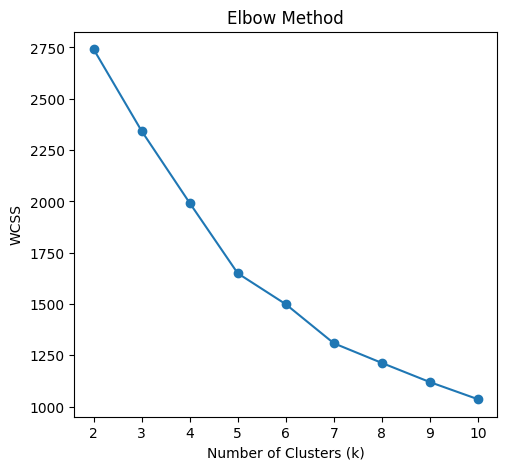

In [15]:

# Function to plot the elbow curve and silhouette score
def plot_clusters_evaluation(data, max_clusters=10):
    wcss = []  # Within-cluster sum of squares
    silhouette_scores = []

    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plot elbow curve
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')


# Plot clusters evaluation (Elbow curve and Silhouette Score)
plot_clusters_evaluation(df_final)

# We will go with 5 clusters as per the WSS plot

In [16]:
# Perform KMeans clustering with the chosen k
k = 5  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df_final['Cluster'] = kmeans.fit_predict(df_final)

# Display the dataframe with cluster assignments
print(df_final.head())


       PCA1     Fresh   Grocery    Frozen  Delicassen  Channel_2  Region_2  \
0  1.261448  0.121429  0.016617 -0.880896    0.069685   1.448652 -0.345822   
1  1.551016 -0.417224  0.280804 -0.317515    0.472359   1.448652 -0.345822   
2  1.807547 -0.484796  0.032808 -0.083502    3.047909   1.448652 -0.345822   
3 -1.336076  0.178634 -0.423036  1.371897    0.483391  -0.690297 -0.345822   
4  0.942838  1.076069 -0.031166  0.466049    3.047909   1.448652 -0.345822   

   Region_3  Cluster  
0  0.626422        2  
1  0.626422        2  
2  0.626422        2  
3  0.626422        4  
4  0.626422        2  


c:\Users\aksha\anaconda3\envs\python_3.11.5\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
# Map the cluster values to the original dataframe

df_cluster_mapped = pd.concat([df, df_final[['Cluster']]], axis = 1)

### View the Cluster Profiles

In [18]:
cluster_profiles = df_cluster_mapped.groupby('Cluster').agg({
    'Channel': lambda x: x.value_counts().idxmax(),
    'Region': lambda x: x.value_counts().idxmax(),
    'Fresh': 'mean',
    'Milk': 'mean',
    'Grocery': 'mean',
    'Frozen': 'mean',
    'Detergents_Paper': 'mean',
    'Delicassen': 'mean'
}).reset_index()

# Display the profile of each cluster
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
   Cluster  Channel  Region         Fresh          Milk       Grocery  \
0        0        1       3   8295.279793   2792.775907   3345.146373   
1        1        2       3   7818.967262  14826.755952  25782.071429   
2        2        2       3   8963.205056   7164.876404  11233.831461   
3        3        1       2  10815.763158   2856.680921   5404.848684   
4        4        1       3  24097.435897   4002.913462   4328.714744   

        Frozen  Detergents_Paper   Delicassen  
0  1721.891192        650.238342   845.196891  
1  1845.142857      11196.660714  2078.059524  
2  1374.741573       4719.044944  1403.792135  
3  2953.608553       1501.562500   994.743421  
4  6599.259615        645.500000  1823.455128  


In [19]:
df_final.Cluster.value_counts()

Cluster
0    193
2     89
4     78
1     42
3     38
Name: count, dtype: int64

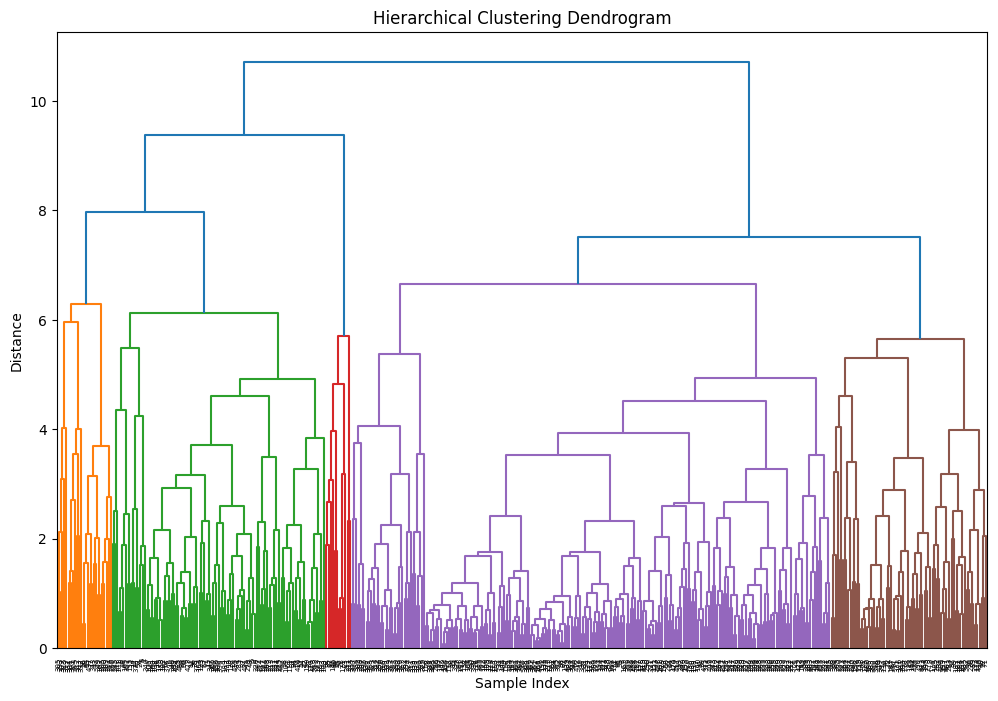

In [20]:
# Hierarchical Clustering
df_scaled.head(5)

# Hierarchical clustering using complete linkage
linkage_matrix = linkage(df_scaled, method='complete', metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### Findings from Hierarchical Clustering

The plot seems to validate the outcome of Kmeans clustering of 5 clutsers.

# Conclusion 

### Cluster Profiles 

#### Cluster 0:

- Channel: Retail (2)
- Region: Other (3)
- Spending Pattern:
    - Highest spending on Grocery and Detergents_Paper.
    - Moderate spending on Fresh and Milk.
    - Relatively lower spending on Frozen and Delicassen.
    - Highest count of records in this cluster, and hence more emphasis shall be laid to this cluster.

#### Cluster 1:

- Channel: Hotel/Restaurant/Cafe (1)
- Region: Other (3)
- Spending Pattern:
    - Extremely high spending on Fresh products.
    - Moderate spending on Frozen, Delicassen, and Grocery.
    - Low spending on Milk and Detergents_Paper.

#### Cluster 2:
- Channel: Hotel/Restaurant/Cafe (1)
- Region: Other (3)
- Spending Pattern:
    - Low to moderate spending across all product categories.
    - Slightly higher spending on Fresh products.
    - Lowest spending on Grocery and Detergents_Paper.

#### Cluster 3:
- Channel: Hotel/Restaurant/Cafe (1)
- Region: Oporto (2)
- Spending Pattern:
    - Moderate spending on Fresh and Grocery.
    - Relatively lower spending on Milk, Frozen, Detergents_Paper, and Delicassen.

#### Cluster 4:
- Channel: Retail (2)
- Region: Other (3)
- Spending Pattern:
    - Highest spending on Grocery, Milk, and Detergents_Paper.
    - Moderate spending on Fresh and Frozen.
    - Relatively lower spending on Delicassen.



These findings provide insights into the distinct spending patterns of each cluster, which can be valuable for tailoring marketing strategies, supply chain management, and customer relationship initiatives. Further analysis and actions can be taken based on these cluster profiles to optimize business operations and enhance customer satisfaction.